In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

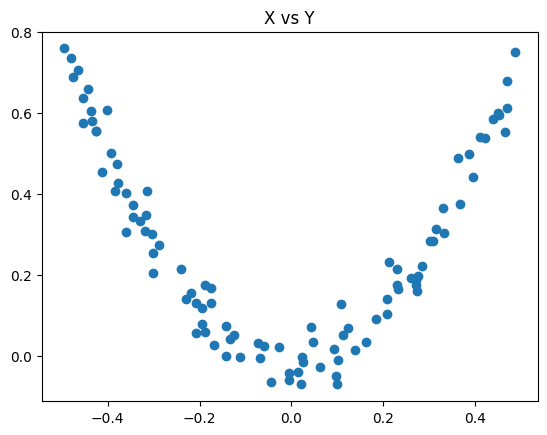

In [3]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5
y = 3 * x[:, 0]**2 + 0.05 * np.random.randn(100)

df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y

plt.scatter(df['x'],df['y'])
plt.title('X vs Y')
plt.show()

The first prediction value will be just average (mean) of the target values

In [4]:
df['pred1'] = df['y'].mean()

Pseudo-residuals are the differences between the actual values and the predictions from the first model. These residuals are what the next model2 (m2) will try to predict.


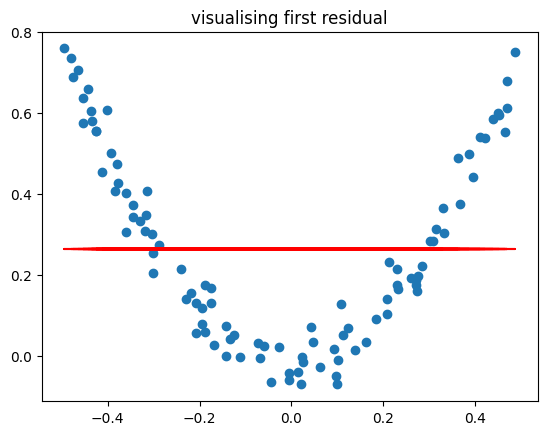

In [12]:
df['res1'] = df['y'] - df['pred1'] #residual1
# let's view it visually on the same scatterplot
plt.scatter(df['x'],df['y'])
plt.title('visualising first residual')
plt.plot(df['x'],df['pred1'],color='red')  #visualing the first prediction that is just the average values
plt.show()

Building the Second Model

In [13]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

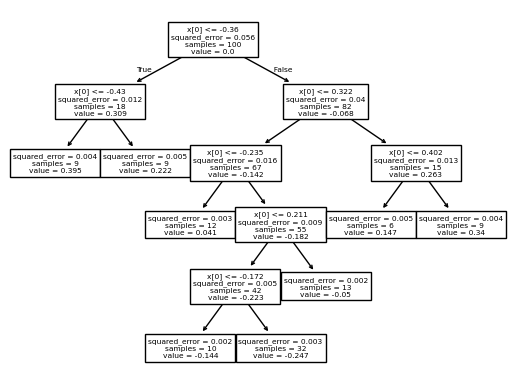

In [14]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

We combine the predictions from m1 and m2 to get updated predictions.

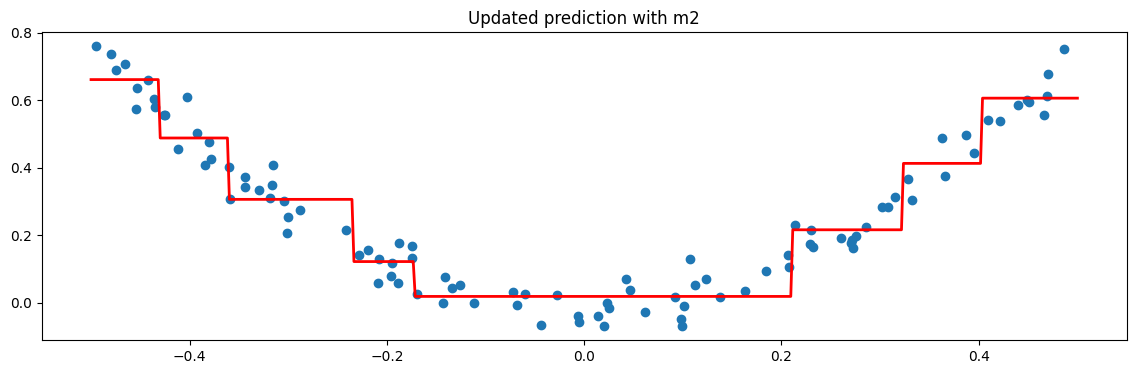

In [15]:
x_test = np.linspace(-0.5, 0.5, 500)
y_pred = df['pred1'].iloc[0] + tree1.predict(x_test.reshape(500,1))

plt.figure(figsize=(14,4))
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])
plt.title('Updated prediction with m2')
plt.show()

We can further improve the fit by adding a third model (m3). First, we calculate new pseudo-residuals (res2) and then fit another decision tree (tree2).

In [20]:
df['pred2'] = df['pred1'].iloc[0] + tree1.predict(df['x'].values.reshape(100,1))
df['res2'] = df['y'] - df['pred2']

tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['x'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

Now, we combine all predictions (m1, m2, m3) to get the final prediction:

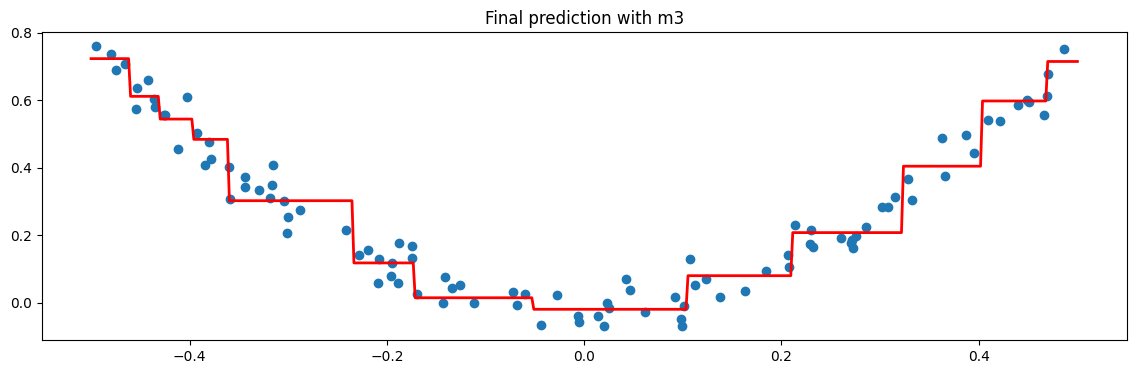

In [23]:
y_pred = df['pred1'].iloc[0] + tree1.predict(x_test.reshape(500,1)) + tree2.predict(x_test.reshape(500,1))

plt.figure(figsize=(14,4))
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['x'], df['y'])
plt.title('Final prediction with m3')
plt.show()